In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(2022)
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
plt.rcParams["figure.figsize"] = (1,1)
for i in range(10):
    plt.imshow(digits.data[i].reshape(8,8))
    plt.colorbar()
    plt.title('히트맵')
    plt.show()

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

digits_std = StandardScaler().fit_transform(digits.data)
y_label = to_categorical(digits.target)
X_train, X_test, Y_train, Y_test = train_test_split(
    digits_std, y_label, stratify = y_label, test_size = 0.2, random_state = 2022
)
model = Sequential([
        Dense(1000, input_shape = (64,), activation = "relu"),
        Dense(500, activation = "relu"),
        Dense(120, activation = "relu"),
        Dense(10, activation = "softmax")
])
model.compile(optimizer = "nadam", loss = "categorical_crossentropy", metrics = ["accuracy"])
mc = ModelCheckpoint("best_digit.h5",monitor = "val_loss", verbose = 0, save_best_only = True)
es = EarlyStopping(patience = 30, verbose = 1, monitor = "val_loss")
model.fit(X_train, Y_train, validation_split = 0.2, callbacks = [mc, es], batch_size = 200, epochs = 1000, verbose = 0)
best_model = load_model("best_digit.h5")
best_model.evaluate(X_test, Y_test)

Epoch 37: early stopping
12/12 [==============================] - 0s 4ms/step - loss: 0.0586 - accuracy: 0.9861


[0.05857861414551735, 0.9861111044883728]

### monitor = "accuracy" 일 경우

In [69]:
model2 = Sequential([
        Dense(500, input_dim = 64, activation = "relu"),
        Dense(100, activation = "relu"),
        Dense(10, activation = "softmax")
])
model2.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
mc2 = ModelCheckpoint("best_digit2.h5",monitor = "accuracy", verbose = 0, save_best_only = True)
es2 = EarlyStopping(patience = 30, verbose = 1, monitor = "accuracy")
hist2 = model2.fit(X_train, Y_train, validation_split = 0.2, callbacks = [mc2, es2], batch_size = 200, epochs = 1000, verbose = 0)
best_model2 = load_model("best_digit2.h5")
best_model2.evaluate(X_test, Y_test)

Epoch 39: early stopping
12/12 [==============================] - 0s 5ms/step - loss: 0.0487 - accuracy: 0.9861


[0.048684194684028625, 0.9861111044883728]

### optimizer = "nadam" 일 경우


In [71]:
model3 = Sequential([
        Dense(500, input_dim = 64, activation = "relu"),
        Dense(120, activation = "relu"),
        Dense(10, activation = "softmax")
])
model3.compile(optimizer = "nadam", loss = "categorical_crossentropy", metrics = ["accuracy"])
mc3 = ModelCheckpoint("best_digit3.h5", monitor = "val_loss", verbose = 0, save_best_only = True)
es3 = EarlyStopping(patience = 30, verbose = 1, monitor = "val_loss")
hist3 = model3.fit(X_train, Y_train, validation_split = 0.2, callbacks = [mc3, es3], batch_size = 200, epochs = 1000, verbose = 0)
best_model3 = load_model("best_digit3.h5")
best_model3.evaluate(X_test, Y_test)

Epoch 37: early stopping
12/12 [==============================] - 0s 5ms/step - loss: 0.0541 - accuracy: 0.9861


[0.05414872616529465, 0.9861111044883728]

### optimizer = "adagrad"일 경우

In [73]:
model4 = Sequential([
        Dense(500, input_dim = 64, activation = "relu"),
        Dense(100, activation = "relu"),
        Dense(10, activation = "softmax")
])
model4.compile(optimizer = "adagrad", loss = "categorical_crossentropy", metrics = ["accuracy"])
mc4 = ModelCheckpoint("best_digit4.h5", monitor = "val_loss", verbose = 0, save_best_only = True)
es4 = EarlyStopping(patience = 30, verbose = 1, monitor = "val_loss")
hist4 = model4.fit(X_train, Y_train, validation_split = 0.2, callbacks = [mc4, es4], batch_size = 200, epochs = 1000, verbose = 0)
best_model4 = load_model("best_digit4.h5")
best_model4.evaluate(X_test, Y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.0999 - accuracy: 0.9778


[0.09992571175098419, 0.9777777791023254]

### optimizer = "RMSprop"일 경우

In [107]:
model5 = Sequential([
        Dense(500, input_dim = 64, activation = "relu"),
        Dense(100, activation = "relu"),
        Dense(10, activation = "softmax")
])
model5.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])
mc5 = ModelCheckpoint("best_digit5.h5", monitor = "val_loss", verbose = 0, save_best_only = True)
es5 = EarlyStopping(patience = 30, verbose = 1, monitor = "val_loss")
hist5 = model5.fit(X_train, Y_train, validation_split = 0.2, callbacks = [mc5, es5], batch_size = 200, epochs = 1000, verbose = 0)
best_model5 = load_model("best_digit5.h5")
best_model5.evaluate(X_test, Y_test)

Epoch 46: early stopping
12/12 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 0.9806


[0.04595372453331947, 0.980555534362793]

### optimizer = "RMSprop", monitor = "accuracy"


In [108]:
model6 = Sequential([
        Dense(768, input_dim = 64, activation = "relu"),
        Dense(384, activation = "relu"),
        Dense(192, activation = "relu"),
        Dense(10, activation = "softmax")
])
model6.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])
mc6 = ModelCheckpoint("best_digit6.h5", monitor = "accuracy", verbose = 0, save_best_only = True)
es6 = EarlyStopping(patience = 30, verbose = 1, monitor = "accuracy")
hist = model6.fit(X_train, Y_train, validation_split = 0.2, callbacks = [mc6, es6], batch_size = 200, epochs = 1000, verbose = 0)
best_model6 = load_model("best_digit6.h5")
best_model6.evaluate(X_test, Y_test)

Epoch 41: early stopping
12/12 [==============================] - 0s 4ms/step - loss: 0.0361 - accuracy: 0.9944


[0.036053452640771866, 0.9944444298744202]

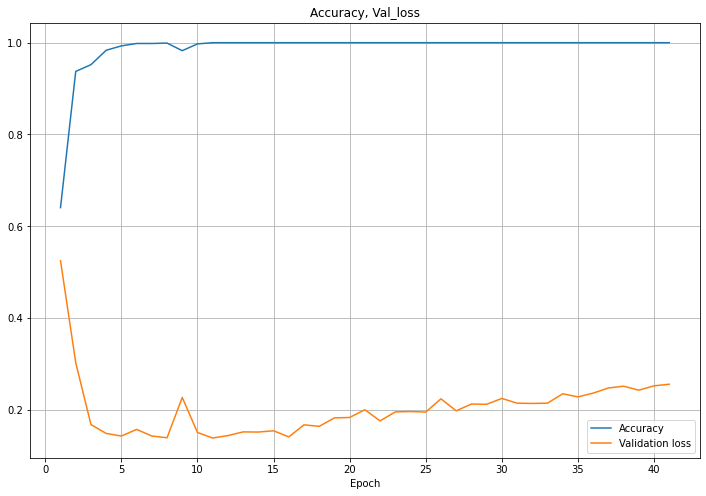

In [110]:
y_acc = hist.history["accuracy"]
y_vloss = hist.history["val_loss"]
xs = np.arange(1, len(y_acc) + 1)

plt.figure(figsize = (12,8))
plt.plot(xs, y_acc, label = "Accuracy")
plt.plot(xs, y_vloss, label = "Validation loss")
plt.legend(), plt.grid(), plt.xlabel("Epoch"), plt.title("Accuracy, Val_loss")
plt.show()

In [114]:
best_model6.evaluate(X_test, Y_test)

12/12 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9944


[0.036053452640771866, 0.9944444298744202]